In [1]:
import pandas as pd

In [81]:
import numpy as np

In [80]:
import matplotlib.pyplot as plt

In [3]:
col_names = ["Class", "Age","Gender", "Alive", "Name", "Don't Know"]
titanic_df = pd.read_csv(r'C:\Users\Yogen\Documents\1. Data Science Courses\2. MIT Data Science Course\Lecture13\TitanicPassengers.txt', header=None, names = col_names)

In [4]:
titanic_df = titanic_df.drop(["Name", "Don't Know"], axis=1)

In [5]:
titanic_df.head()

,Class,Age,Gender,Alive
0,1,29.00,F,1
1,1,0.92,M,1
2,1,2.00,F,0
3,1,30.00,M,0
4,1,25.00,F,0


In [6]:
titanic_df = pd.get_dummies(titanic_df)

In [7]:
titanic_df.head()

,Class,Age,Alive,Gender_F,Gender_M
0,1,29.00,1,1,0
1,1,0.92,1,0,1
2,1,2.00,0,1,0
3,1,30.00,0,0,1
4,1,25.00,0,1,0


In [8]:
#convert class to categorical variable and then add dummies
titanic_df.loc[titanic_df["Class"]==1, 'Class'] = 'A'
titanic_df.loc[titanic_df["Class"]==2, 'Class'] = 'B'
titanic_df.loc[titanic_df["Class"]==3, 'Class'] = 'C'

In [9]:
titanic_df['Class'].unique()

array(['A', 'B', 'C'], dtype=object)

In [10]:
titanic_df = pd.get_dummies(titanic_df)

In [11]:
titanic_df.head()

,Age,Alive,Gender_F,Gender_M,Class_A,Class_B,Class_C
0,29.00,1,1,0,1,0,0
1,0.92,1,0,1,1,0,0
2,2.00,0,1,0,1,0,0
3,30.00,0,0,1,1,0,0
4,25.00,0,1,0,1,0,0


In [12]:
# scaling age
def z_scaling(vals):
    vals = np.array(vals)
    mean, std = np.mean(vals), np.std(vals)
    z = (vals-mean)/std
    return z

In [13]:
titanic_df["Age"] = z_scaling(titanic_df["Age"])

In [14]:
titanic_df.head()

,Age,Alive,Gender_F,Gender_M,Class_A,Class_B,Class_C
0,-0.061162,1,1,0,1,0,0
1,-2.010268,1,0,1,1,0,0
2,-1.935303,0,1,0,1,0,0
3,0.008251,0,0,1,1,0,0
4,-0.338813,0,1,0,1,0,0


In [15]:
def senstivity_and_specificity(y_test, y_pred):
    confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred))
    specificity = confusion_matrix_df.iloc[0,0]/confusion_matrix_df.sum(axis=1)[0]
    
    senstivity = confusion_matrix_df.iloc[1,1]/confusion_matrix_df.sum(axis=1)[1]
    
    return (senstivity, specificity)

### Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [17]:
x = titanic_df.drop(["Alive"], axis = 1)

In [18]:
y = titanic_df["Alive"]

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)

In [20]:
lm = LogisticRegression()
lm.fit(x_train, y_train)

LogisticRegression()

In [21]:
y_pred = lm.predict(x_test)

In [22]:
pd.DataFrame([y_pred,y_test]).transpose()

,0,1
0,0,0
1,0,1
2,1,0
3,0,0
4,1,1
...,...,...
205,0,0
206,1,0
207,0,0
208,0,0


In [23]:
confusion_matrix(y_test, y_pred)

array([[94, 19],
       [23, 74]], dtype=int64)

In [24]:
senstivity_and_specificity(y_test, y_pred)

(0.7628865979381443, 0.831858407079646)

In [128]:
senstivity_list =[]
specificity_list = []
for i in range(50):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
    lm = LogisticRegression()
    lm.fit(x_train, y_train)
    y_pred_lm = lm.predict(x_test)
    senstivity, specificity = senstivity_and_specificity(y_test, y_pred_lm)
    senstivity_list.append(senstivity)
    specificity_list.append(specificity)

In [121]:
np.mean(senstivity_list)

0.7031018403583061

In [122]:
np.mean(specificity_list)

0.8396165172378474

### Receiver Operating Characteristic

In [109]:
from sklearn.metrics import auc

In [130]:
senstivity_list =[]
specificity_list = []
for i in range(50):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
    lm = LogisticRegression()
    lm.fit(x_train, y_train)
    y_pred_lm = lm.predict_proba(x_test)

In [85]:
def apply_probability_threshold(threshold, y_prob):
    death_probabilities = []
    for prob in y_prob:
        death_probabilities.append(prob[0])
        
    #using threshold for qualifying data
    new_predictions = []
    for entry in death_probabilities:
        if entry >= threshold:
            new_predictions.append(0)
        else:
            new_predictions.append(1)
    return new_predictions

In [131]:
apply_probability_threshold(0.5, y_pred_lm)

[1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1]

In [143]:
senstivity_values = []
one_minus_specificity_values = []
for i in range(100):
    new_pred = apply_probability_threshold(i/100, y_pred_lm)
    senstivity, specificity = senstivity_and_specificity(np.array(y_test), np.array(new_pred))
    senstivity_values.append(senstivity)
    one_minus_specificity_values.append(1-specificity)
    

In [146]:
auroc = auc(one_minus_specificity_values, senstivity_values)
auroc

0.8277023728151548

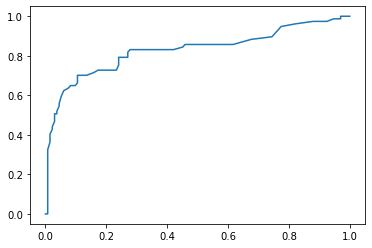

In [145]:
plt.plot(one_minus_specificity_values, senstivity_values, label = area_under_curve)


We will make a lot of splits in the data and then calculate Area Under ROC for a lot of predictions and average them/

In [147]:
auroc = []
lm = LogisticRegression()
for i in range(50):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
    lm.fit(x_train, y_train)
    y_pred_lm = lm.predict_proba(x_test)
    
    senstivity_values = []
    one_minus_specificity_values = []
    for i in range(100):
        new_pred = apply_probability_threshold(i/100, y_pred_lm)
        senstivity, specificity = senstivity_and_specificity(np.array(y_test), np.array(new_pred))
        senstivity_values.append(senstivity)
        one_minus_specificity_values.append(1-specificity)
    auroc.append(auc(one_minus_specificity_values, senstivity_values))

In [149]:
np.mean(auroc)

0.8309697711312648